# Consigna:

- Parte 1 (imágenes en `/white_patch` y `/coord_cromaticas`)
    - Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.
    - Implementar el algoritmo WhitePatch para librarnos de las diferencias de color de iluminación.
    - Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de WhitePatch
- Parte 2:
    - Para las imágenes `img1_tp.png` y `img2_tp.png` leerlas con OpenCV en escala de grisas y visualizarlas.
    - Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. Explicar lo que se observa. ¿Si tuviera que entrenar un modelo de clasificación/detección de imágenes, considera que puede ser de utilidad tomar como features a los histogramas
    - Para la imagen `segmentacion.png` analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes separadas.


# Resolución
## Importación de librerías públicas

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

%matplotlib inline

## Importación de módulos codeados en el repo

In [2]:
# Set path to reach src folder
import sys

sys.path.append("../")

In [3]:
from src.img_utils import (
    load_as_gray,
    load_as_HSV,
    load_as_RGB,
    tform_crom_coord,
    tform_white_patch,
)

## Parte 1
### Visualizacion inicial de las imágenes de `/coord_cromaticas`

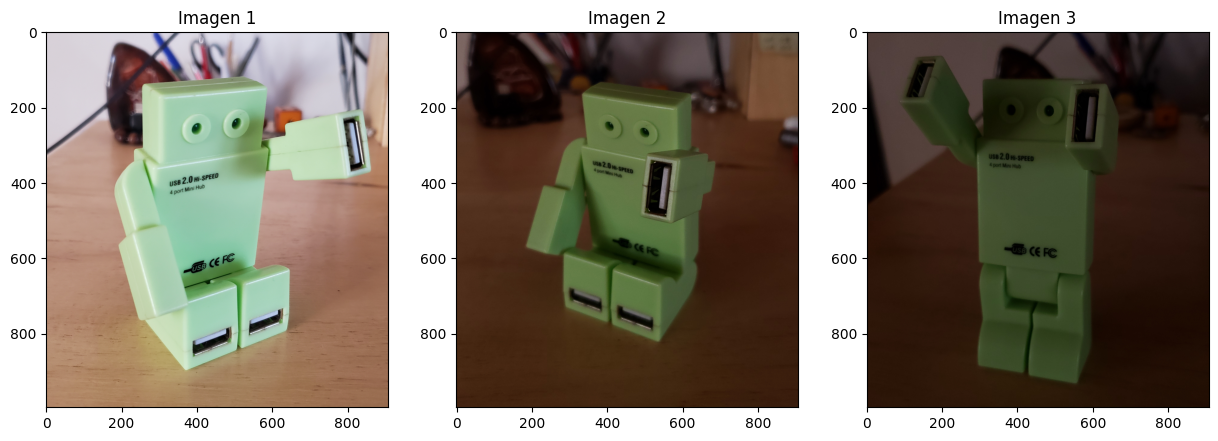

In [4]:
# Load images
cro_img1 = load_as_RGB("resources/coord_cromaticas/CoordCrom_1.png")
cro_img2 = load_as_RGB("resources/coord_cromaticas/CoordCrom_2.png")
cro_img3 = load_as_RGB("resources/coord_cromaticas/CoordCrom_3.png")


# Show images in single row
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, img in enumerate([cro_img1, cro_img2, cro_img3]):
    axes[i].imshow(img)
    axes[i].set_title(f"Imagen {i + 1}")

### Aplicamos algoritmo de pasaje a coordenadas cromáticas

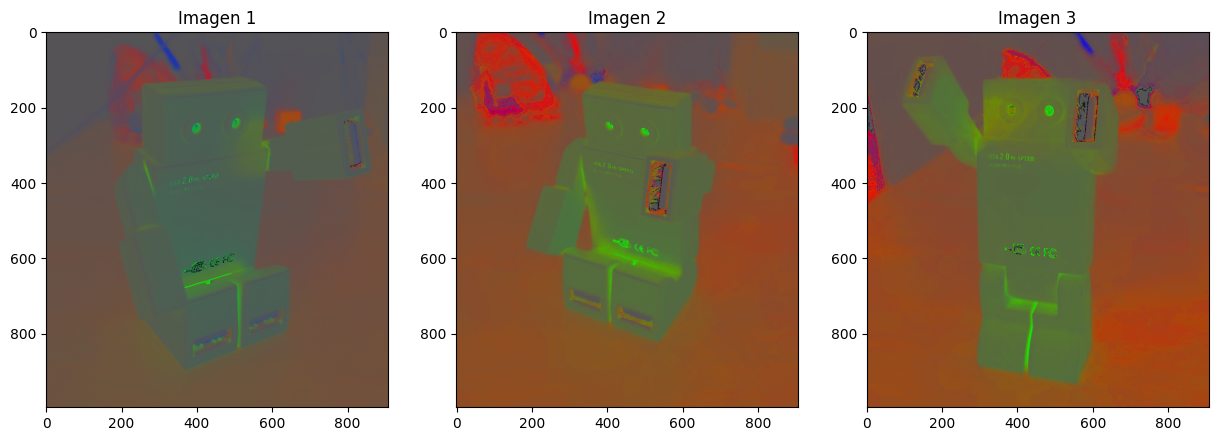

In [5]:
cro_img1 = tform_crom_coord(cro_img1)
cro_img2 = tform_crom_coord(cro_img2)
cro_img3 = tform_crom_coord(cro_img3)

# Show images in single row
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, img in enumerate([cro_img1, cro_img2, cro_img3]):
    axes[i].imshow(img)
    axes[i].set_title(f"Imagen {i + 1}")

### Visualizacion inicial de las imágenes de `/white_patch`

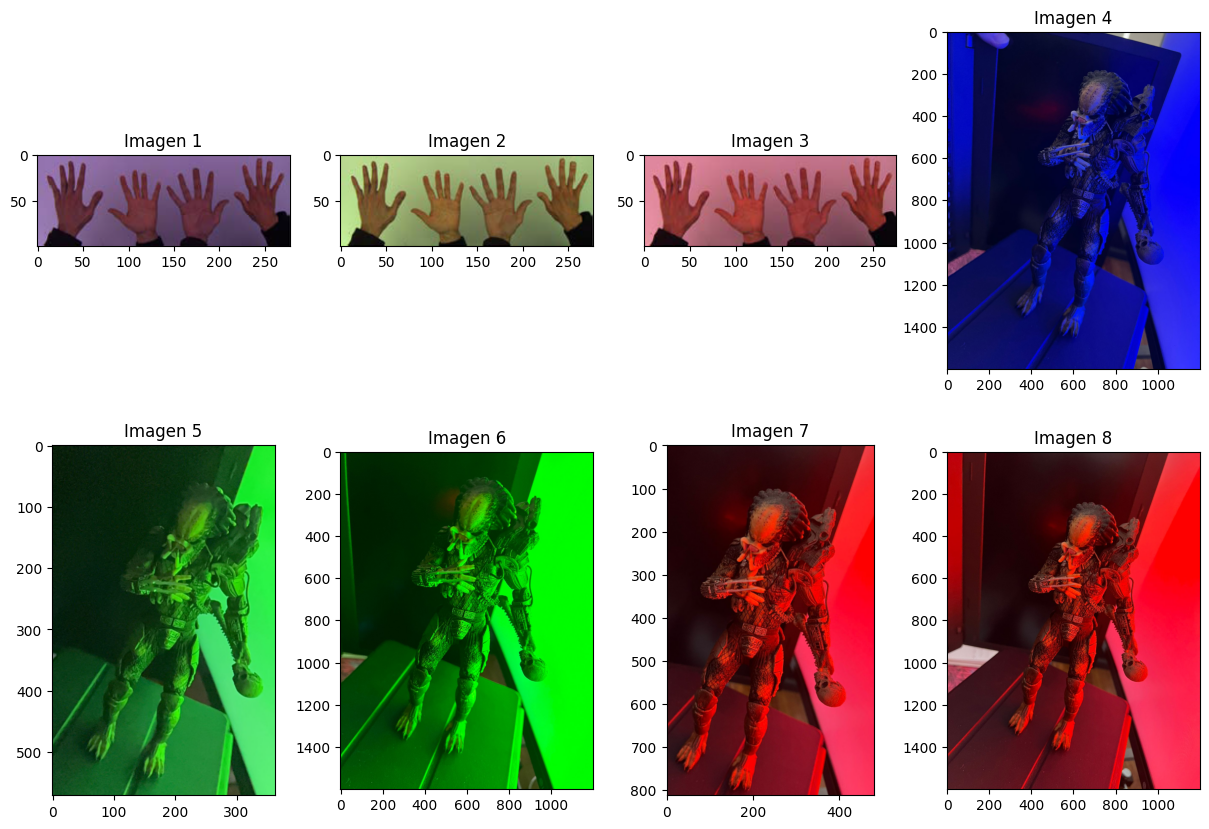

In [6]:
# Load images
wp_img1 = load_as_RGB("resources/white_patch/test_blue.png")
wp_img2 = load_as_RGB("resources/white_patch/test_green.png")
wp_img3 = load_as_RGB("resources/white_patch/test_red.png")
wp_img4 = load_as_RGB("resources/white_patch/wp_blue.jpg")
wp_img5 = load_as_RGB("resources/white_patch/wp_green.png")
wp_img6 = load_as_RGB("resources/white_patch/wp_green2.jpg")
wp_img7 = load_as_RGB("resources/white_patch/wp_red.png")
wp_img8 = load_as_RGB("resources/white_patch/wp_red2.jpg")


# Show images in two rows
fig, axes = plt.subplots(2, 4, figsize=(15, 10))

for i, img in enumerate(
    [wp_img1, wp_img2, wp_img3, wp_img4, wp_img5, wp_img6, wp_img7, wp_img8]
):
    ax = axes[int(i / 4)][i % 4]
    ax.imshow(img)
    ax.set_title(f"Imagen {i + 1}")

### Aplicamos algoritmo de White Patch

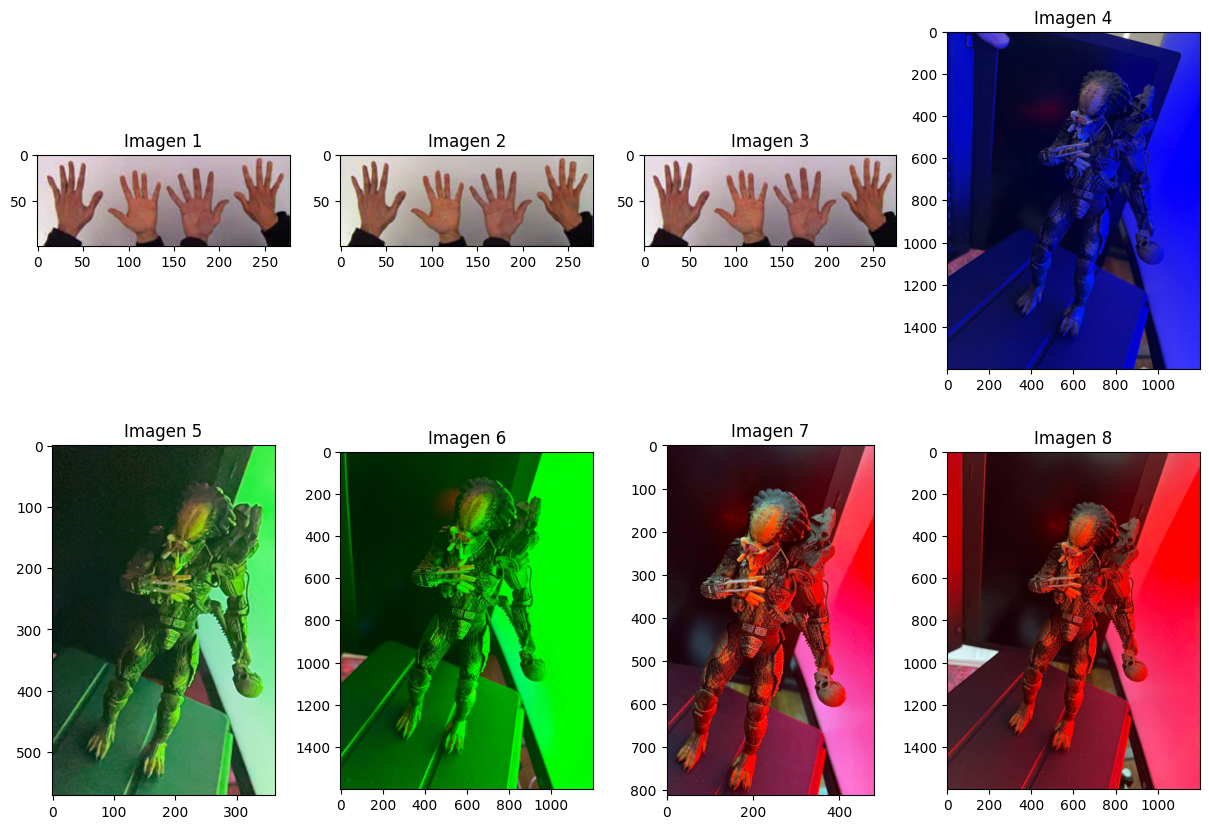

In [7]:
wp_img1 = tform_white_patch(wp_img1)
wp_img2 = tform_white_patch(wp_img2)
wp_img3 = tform_white_patch(wp_img3)
wp_img4 = tform_white_patch(wp_img4)
wp_img5 = tform_white_patch(wp_img5)
wp_img6 = tform_white_patch(wp_img6)
wp_img7 = tform_white_patch(wp_img7)
wp_img8 = tform_white_patch(wp_img8)

# Show images in two rows
fig, axes = plt.subplots(2, 4, figsize=(15, 10))

for i, img in enumerate(
    [wp_img1, wp_img2, wp_img3, wp_img4, wp_img5, wp_img6, wp_img7, wp_img8]
):
    ax = axes[int(i / 4)][i % 4]
    ax.imshow(img)
    ax.set_title(f"Imagen {i + 1}")

#### Comentarios sobre el algoritmo white patch

Este algoritmo permite balancear el color asumiendo que la iluminacion de la imagen es blanca o gris. En casos en los que las imagenes estén muy sauradas o iluminadas de un único color este algoritmo no tiene un buen rendimiento y apenas tiene resultados notables.

## Parte 2
### Visualizacion de `img1_tp.png` y `img2_tp.png` en escala de grises

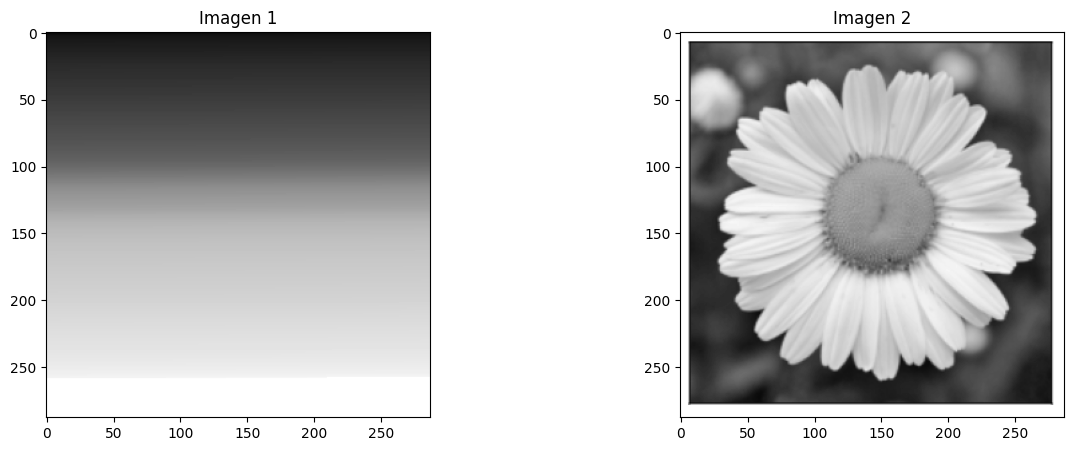

In [8]:
gray_img1 = load_as_gray("resources/img1_tp.png")
gray_img2 = load_as_gray("resources/img2_tp.png")

# Show images in single row
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, img in enumerate(
    [
        gray_img1,
        gray_img2,
    ]
):
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"Imagen {i + 1}")

### Representacion de histogramas

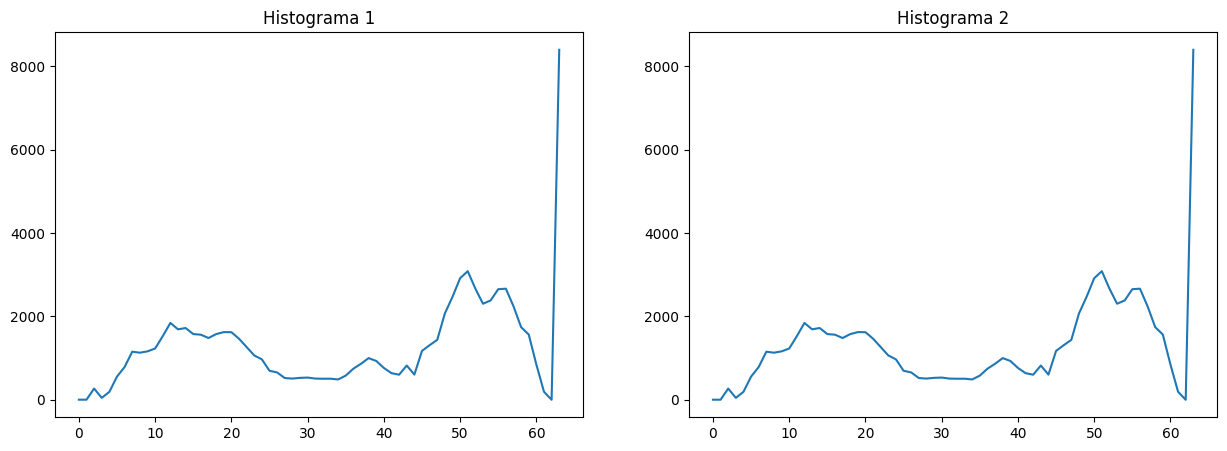

In [9]:
hist1, bins1 = np.histogram(gray_img1.ravel(), 64, [0, 256])
hist2, bins2 = np.histogram(gray_img2.ravel(), 64, [0, 256])

# Show histograms in single row
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, hist in enumerate(
    [
        hist1,
        hist2,
    ]
):
    axes[i].plot(hist)
    axes[i].set_title(f"Histograma {i + 1}")

#### Analisis de los histogramas

Como se puede observar, los histogramas son idénticos. No sería útil entrenar un modelo de machine learning (únicamente) a partir de histogramas ya que cualquier imagen con una proporcion de grises similar se confundiría con los objetos que pretendemos que identifique. La ordenación de los pixeles, tanto en escala de grises como en escala de color, es determinante a la hora de detectar objetos.

### Ejercicio de `segmentación.png`
### Visualización de la imagen original y sus histogramas

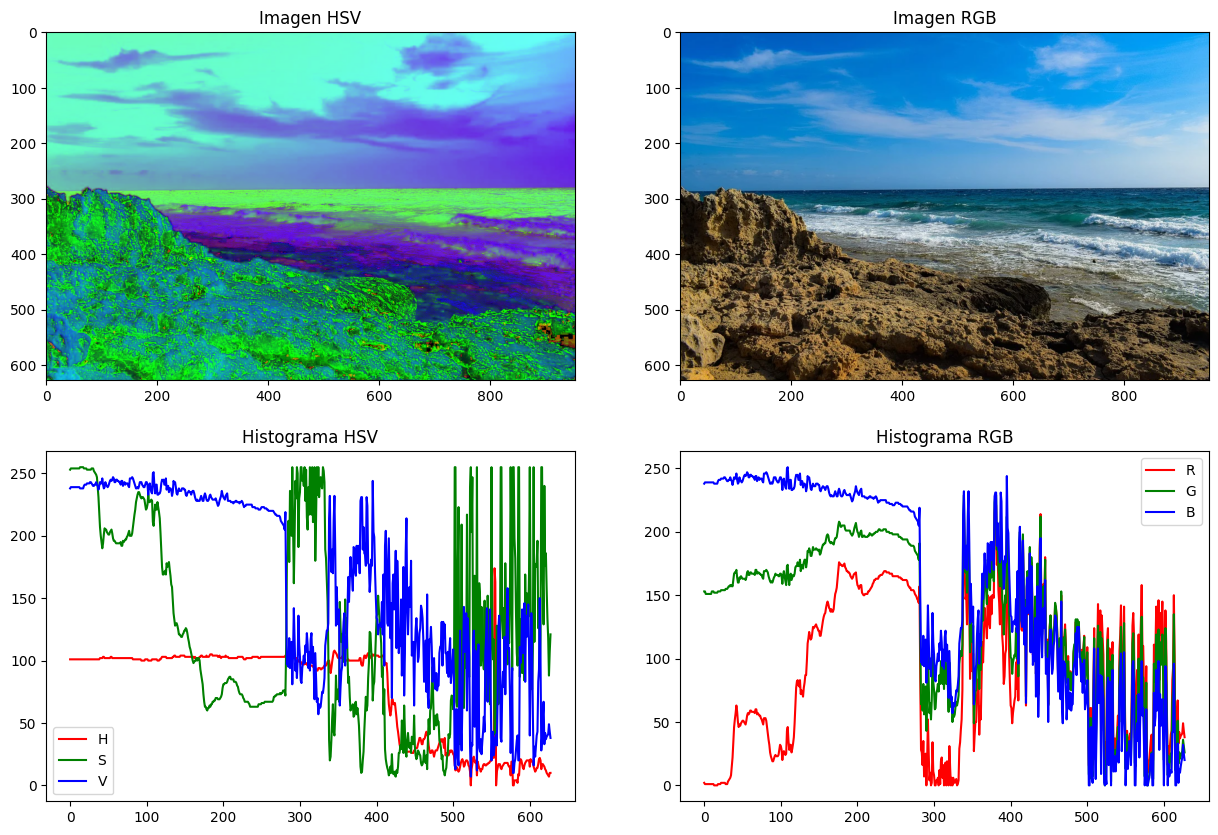

In [10]:
seg_img_HSV = load_as_HSV("resources/segmentacion.png")
seg_img_RGB = load_as_RGB("resources/segmentacion.png")

# Show images in single row
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0][0].imshow(seg_img_HSV)
axes[0][0].set_title(f"Imagen HSV")
axes[0][1].imshow(seg_img_RGB)
axes[0][1].set_title(f"Imagen RGB")

# Histograms
col = 800
profile_HSV = seg_img_HSV[:, col]
profile_RGB = seg_img_RGB[:, col]

axes[1][0].plot(profile_HSV[:,0], color='r',label='H')
axes[1][0].plot(profile_HSV[:,1], color='g',label='S')
axes[1][0].plot(profile_HSV[:,2], color='b',label='V')
axes[1][0].set_title(f"Histograma HSV")
axes[1][0].legend()

axes[1][1].plot(profile_RGB[:,0], color='r',label='R')
axes[1][1].plot(profile_RGB[:,1], color='g',label='G')
axes[1][1].plot(profile_RGB[:,2], color='b',label='B')
axes[1][1].set_title(f"Histograma RGB")
axes[1][1].legend()

#### Comentarios sobre los histogramas
En HSV, el valor H se diferencia claramente en el segmento de tierra respecto al resto de la imagen. Por otro lado, en RGB hay una diferencia notable entre los valores RGB de las nubes y del mar, tambien se nota esa diverencia en el valor V de HSV.

Con estas dos caracteristicas debería ser posible separar los tres segmentos de imagen.

Pasamos a obtener los valores medios que nos interesan.

Text(0.5, 1.0, 'Muestra Mar (Valor hue de 96.79076526857983 y Valor value de 116.05669610007358)')

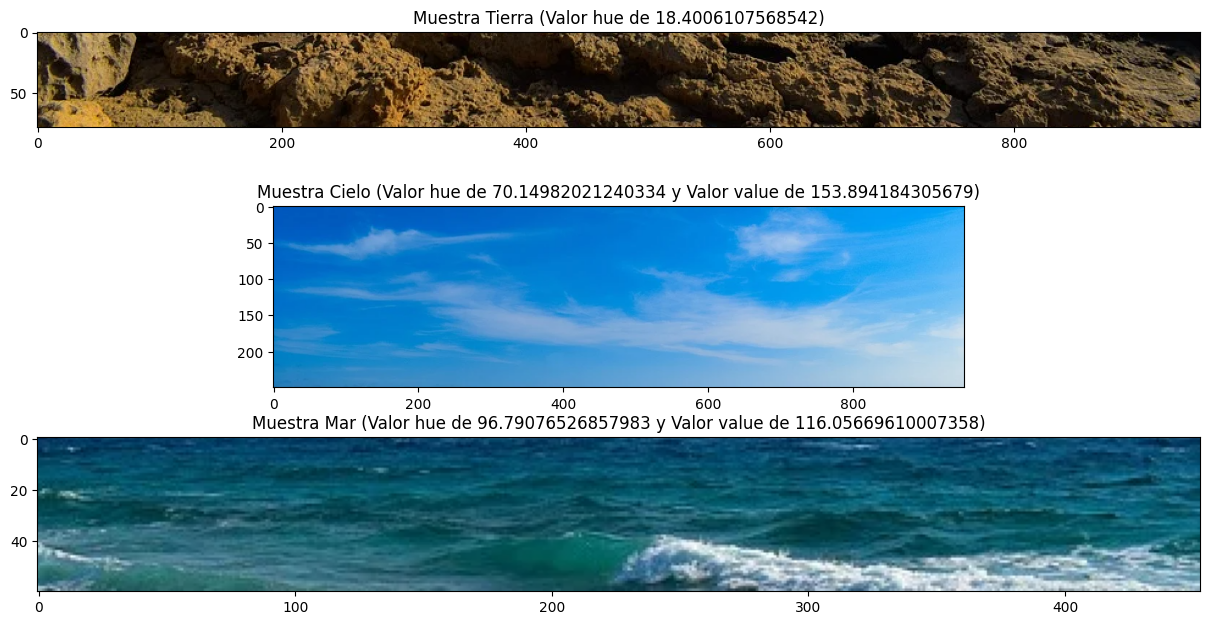

In [11]:
# Land sample
muestra_tierra_HSV = seg_img_HSV[550:, :, 0]
muestra_tierra_RGB = seg_img_RGB[550:, :, :]

tierra_H_medio = np.mean(muestra_tierra_HSV)

# Sky sample
muestra_cielo_HSV = seg_img_HSV[:250, :, :]
muestra_cielo_RGB = seg_img_RGB[:250, :, :]

cielo_H_medio, _, cielo_V_medio = np.mean(seg_img_HSV, axis=(0, 1))

# Sea sample
muestra_mar_HSV = seg_img_HSV[290:350, 500:, :]
muestra_mar_RGB = seg_img_RGB[290:350, 500:, :]

mar_H_medio, _, mar_V_medio = np.mean(muestra_mar_HSV, axis=(0, 1))

# Show samples in single row
fig, axes = plt.subplots(3, 1, figsize=(15, 8))
axes[0].imshow(muestra_tierra_RGB)
axes[0].set_title(f"Muestra Tierra (Valor hue de {tierra_H_medio})")

axes[1].imshow(muestra_cielo_RGB)
axes[1].set_title(
    f"Muestra Cielo (Valor hue de {cielo_H_medio} y Valor value de {cielo_V_medio})"
)

axes[2].imshow(muestra_mar_RGB)
axes[2].set_title(
    f"Muestra Mar (Valor hue de {mar_H_medio} y Valor value de {mar_V_medio})"
)

Aplicacion de máscaras y resultados:

Text(0.5, 1.0, 'Objeto segmentado mar')

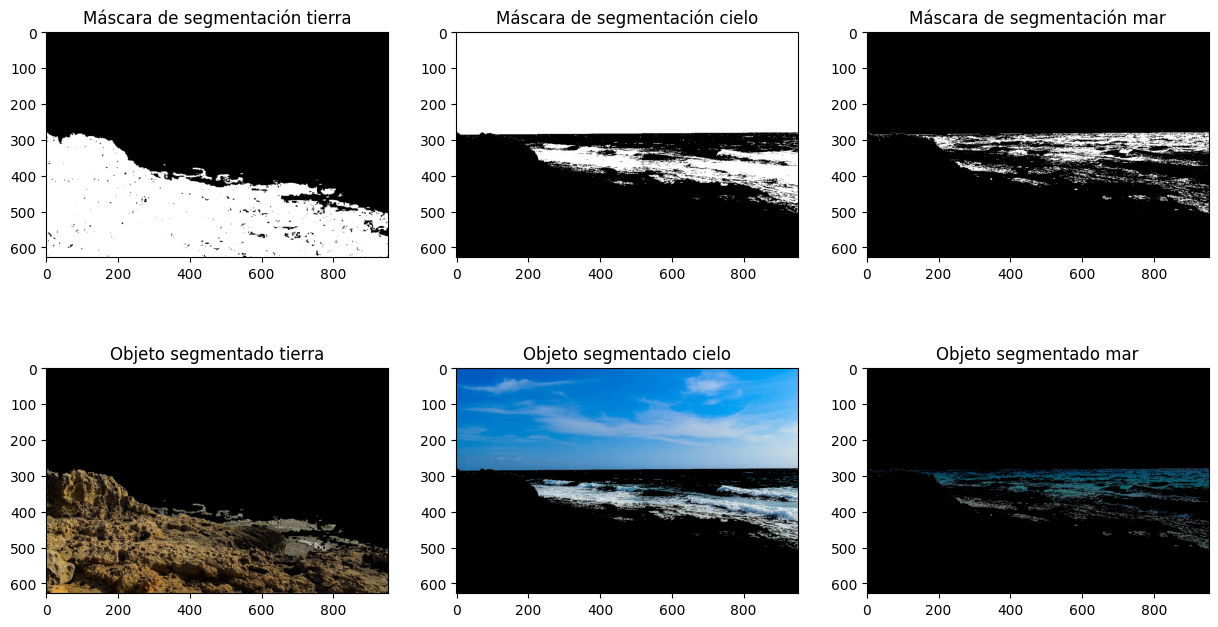

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

color_l = (0, 0, 0)
color_u = (tierra_H_medio + 10, 255, 255)

mask = cv.inRange(seg_img_HSV, color_l, color_u)
img_segmentada = cv.bitwise_and(seg_img_RGB, seg_img_RGB, mask=mask)

axes[0][0].imshow(mask, cmap="gray")
axes[0][0].set_title("Máscara de segmentación tierra")
axes[1][0].imshow(img_segmentada)
axes[1][0].set_title("Objeto segmentado tierra")

hue_blue_min = min(cielo_H_medio, mar_H_medio)
hue_blue_max = max(cielo_H_medio, mar_H_medio)
color_l = (hue_blue_min - 20, 0, cielo_V_medio - 20)
color_u = (hue_blue_max + 20, 255, 255)

mask = cv.inRange(seg_img_HSV, color_l, color_u)
img_segmentada = cv.bitwise_and(seg_img_RGB, seg_img_RGB, mask=mask)

axes[0][1].imshow(mask, cmap="gray")
axes[0][1].set_title("Máscara de segmentación cielo")
axes[1][1].imshow(img_segmentada)
axes[1][1].set_title("Objeto segmentado cielo")

color_l = (hue_blue_min - 20, 0, mar_V_medio - 20)
color_u = (hue_blue_max + 20, 255, mar_V_medio + 20)

mask = cv.inRange(seg_img_HSV, color_l, color_u)
img_segmentada = cv.bitwise_and(seg_img_RGB, seg_img_RGB, mask=mask)

axes[0][2].imshow(mask, cmap="gray")
axes[0][2].set_title("Máscara de segmentación mar")
axes[1][2].imshow(img_segmentada)
axes[1][2].set_title("Objeto segmentado mar")

#### Último comentario
Es posible aplicar una máscara más inteligente al cielo y al mar si realizamos una deteccion del horizonte. Suponiendo que se toma la imagen con la cámara bien orientada (el horizonte es horizontal) se puede obtener la primera fila de la imagen en la que se aplica el filtro del mar y tomar ese valor como un parámetro más de la máscara. Es decir, se limita la máscara de cielo por encima del horizonte y se modifica el filtro del mar para "incluir" las detecciones de la máscara del cielo en las filas por debajo del horizonte